<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

завантаження датасету

In [18]:
! ls -local

total 20
drwxr-xr-x 1 root 4096 Dec 14 13:18 .
drwxr-xr-x 1 root 4096 Dec 14 13:18 ..
drwxr-xr-x 4 root 4096 Dec 12 15:02 .config
drwx------ 5 root 4096 Dec 14 13:18 drive
drwxr-xr-x 1 root 4096 Dec 12 15:02 sample_data


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df_mnist = pd.read_csv('/content/drive/MyDrive/навчання/Data Science/mnist.csv')
df_2d = pd.read_csv('/content/drive/MyDrive/навчання/Data Science/data_2d.csv', header=None)
df_mnist = pd.read_csv('/content/drive/MyDrive/навчання/Data Science/mnist.csv', header=None)
df_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


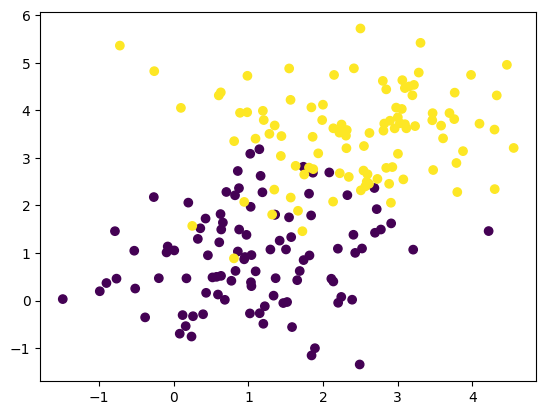

In [22]:
plt.scatter(df_2d[1], df_2d[2], c=df_2d[0])
plt.show()

Ліктевий метод визначення оптимальної кількості кластерів для data_2d

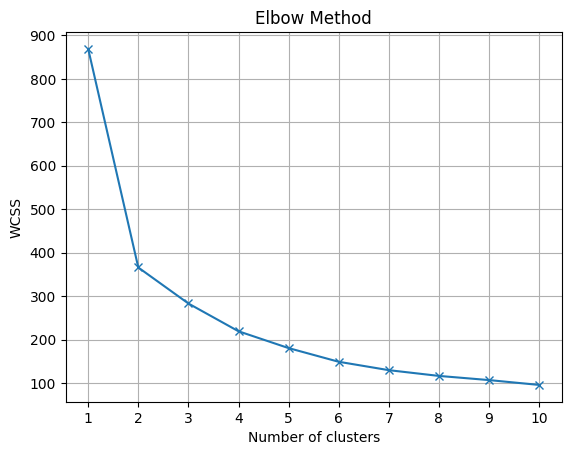

In [23]:
from sklearn.cluster import KMeans
distortion = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_2d)
    distortion.append(kmeans.inertia_)
plt.plot(range(1, 11), distortion, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Судячи з графіку число кластерів для data_2d дорівнює 2

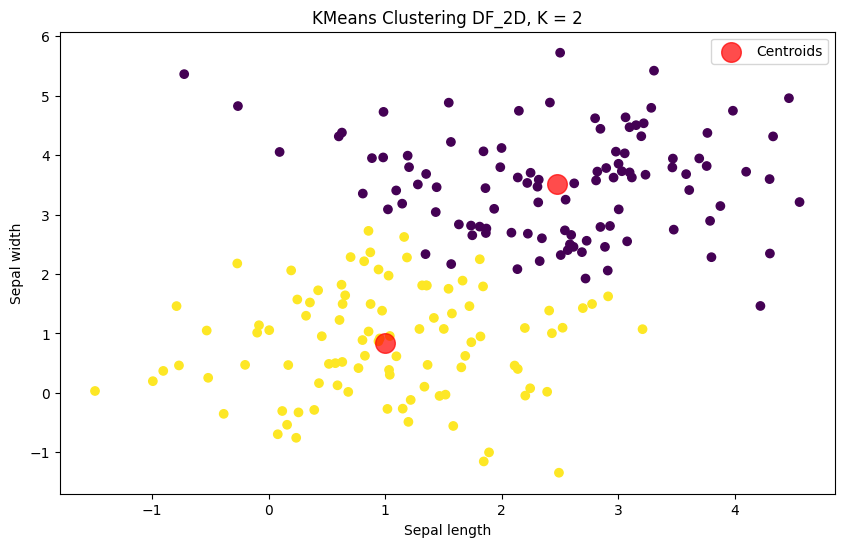

In [35]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_2d)

plt.figure(figsize=(10,6))
plt.scatter(df_2d[1], df_2d[2], c=pred_y)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DF_2D, K = 2')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

mnist


In [26]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Нормалізуємо датасет df_mnist

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_mnist)

Зменшимо розмірність датасету до 2-х вимірного

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
df_mnist_2d = pd.DataFrame(data = principalComponents, columns=[1, 2])
df_mnist_2d.head()

,1,2
0,-4.528470,4.196498
1,5.025678,-12.464857
2,-6.907427,-5.890229
3,8.584182,-0.337402
4,1.105909,6.577112


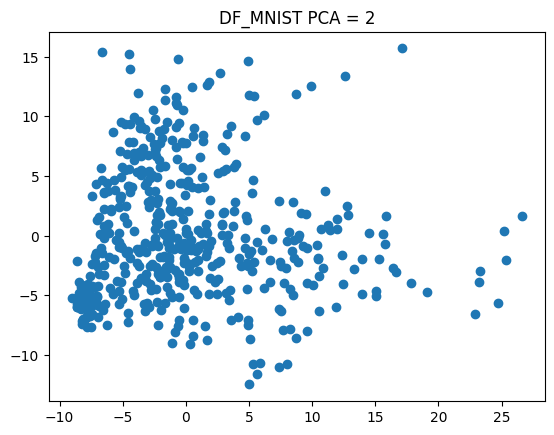

In [37]:
plt.scatter(df_mnist_2d[1], df_mnist_2d[2])
plt.title('DF_MNIST PCA = 2')
plt.show()

Ліктевий метод визначення оптимальної кількості кластерів для df_mnist_2d

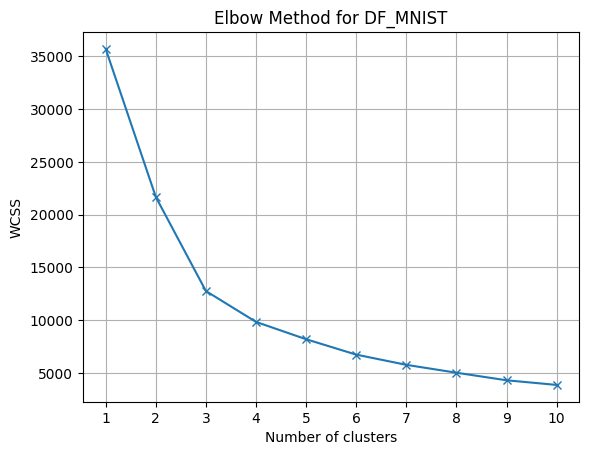

In [38]:
distortion = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_mnist_2d)
    distortion.append(kmeans.inertia_)
plt.plot(range(1, 11), distortion, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method for DF_MNIST')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Оптимальна кількість кластерів = 3

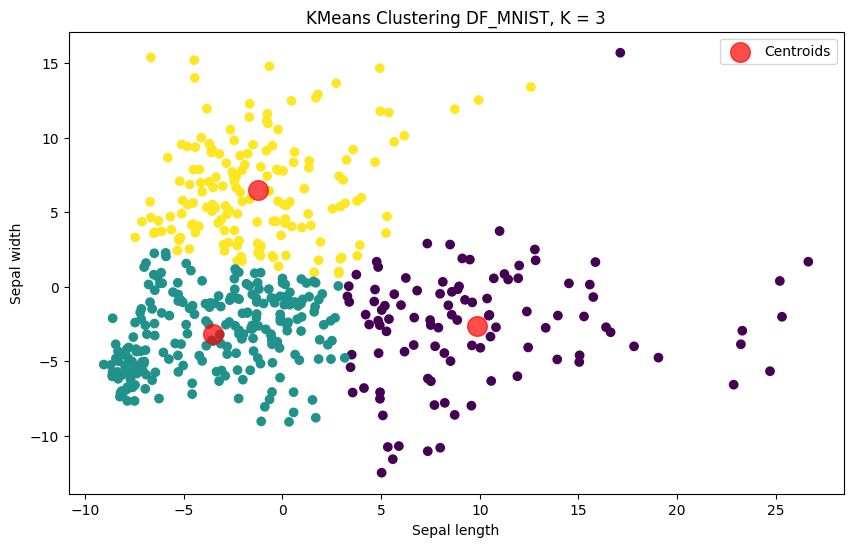

In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_mnist_2d)

plt.figure(figsize=(10,6))
plt.scatter(df_mnist_2d[1], df_mnist_2d[2], c=pred_y, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DF_MNIST, K = 3')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()
